# **Estatistica Descritiva**

## Análise preços de casa

**Importando as bibliotecas usadas**

In [158]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

sns.set_style("dark")

%matplotlib inline
%config InlineBackend.figure_format='retina'

**Carregando dataset House Pricing**

In [159]:
df_house_pricing = pd.read_csv("datasets/house_price.csv")

In [160]:
df_house_pricing.head()

,Unnamed: 0,SalePrice,OverallQual,OverallCond,BedroomAbvGr,TotRmsAbvGrd,GrLivArea,TotalBsmtSF,YearBuilt,MSZoning,Utilities,BldgType
0,0,208500,7,5,3,8,1710,856,2003,RL,AllPub,1Fam
1,1,181500,6,8,3,6,1262,1262,1976,RL,AllPub,1Fam
2,2,223500,7,5,3,6,1786,920,2001,RL,AllPub,1Fam
3,3,140000,7,5,3,7,1717,756,1915,RL,AllPub,1Fam
4,4,250000,8,5,4,9,2198,1145,2000,RL,AllPub,1Fam


### **Descrição dos atribultos do DataFrame**


<p>
       <ul>
              <li>
                      <strong>SalePrice:</strong> Preço de venda
              </li>
              <li>
                      <strong>OverallQual:</strong> Avalie o material geral e o acabamento da casa
              </li>
              <li>
                     <strong>OverallCond:</strong> Avalia a condição geral da casa
              </li>
              <li>
                     <strong>BedroomAbvGr:</strong> Quartos acima do nível (NÃO inclui quartos no subsolo)
              </li>
              <li>
                      <strong>TotRmsAbvGrd:</strong> Total de quartos acima da classe  (não inclui banheiros)
              </li>
              <li>
                    <strong>GrLivArea:</strong> Acima do nível (solo) da área de estar em pés quadrados
              </li>
              <li>
                     <strong>TotalBsmtSF:</strong> Total de pés quadrados da área do porão
              </li>
              <li>
                     <strong>YearBuilt:</strong> Data original de construção
              </li>
              <li>
                     <strong>MSZoning</strong> - Identifica a classificação geral de zoneamento da venda
                     <ul>
                            <li>
                                   <strong>A</strong>    Agriculture (Agricultura)
                             </li>
                             <li>
                                   <strong>C</strong>    Commercial (Comercial)
                             </li>
                             <li>
                                   <strong>FV</strong>    Floating Village Residential (Residencial Vila Flutuante)
                             </li> 
                             <li>
                                   <strong>I</strong>     Industrial (Industrial)
                             </li>
                             <li>
                                   <strong>RH</strong>    Residential High Density (Residencial Alta Densidade)
                             </li>
                             <li>
                                   <strong>RL</strong>    Residential Low Density (Residencial Baixa densidade)
                             </li>
                             <li>
                                    <strong>RP</strong>    Residential Low Density Park  (Parque residencial de baixa densidade)
                             </li>
                             <li>
                                     <strong>RM</strong>    Residential Medium Density  (Residencial Média Densidade)
                             </li>
                     </ul>
              </li>
              <li>
                     <strong>Utilities:</strong> Tipo de utilitários disponíveis
                     <ul>
                            <li>
                                   <strong>AllPub</strong>    All public Utilities (E,G,W,& S) (Todos os serviços públicos (E,G,W e S))
                             </li>
                             <li>
                                   <strong>NoSewr</strong>    Electricity, Gas, and Water (Septic Tank) (Eletricidade, Gás e Água (Fossa séptica))
                             </li>
                             <li>
                                   <strong>NoSeWa</strong>    Electricity and Gas Only (Apenas eletricidade e gás)
                             </li>
                             <li>
                                   <strong>ELO</strong>       Electricity only (Somente eletricidade)
                             </li>
                     </ul>
              </li>
              <li>
                     <strong>BldgType:</strong> Tipo de moradia
                     <ul>
                            <li>
                                   <strong>1Fam</strong>      Single-family Detached  (Desanexação unifamiliar)
                             </li>
                             <li>
                                   <strong>2FmCon</strong>    Two-family Conversion; originally built as one-family dwelling (Conversão de duas famílias; originalmente construído como residência unifamiliar)
                             </li>
                             <li>
                                    <strong>Duplx</strong>     Duplex (Dúplex)
                             </li>
                             <li>
                                   <strong>TwnhsE</strong>    Townhouse End Unit (Unidade final da moradia)
                             </li>
                             <li>
                                    <strong>TwnhsI</strong>    Townhouse Inside Unit (Townhouse dentro da unidade)
                             </li>
                     </ul>
              </li>
       </ul>
</p>




In [161]:
df_house_pricing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    1460 non-null   int64 
 1   SalePrice     1460 non-null   int64 
 2   OverallQual   1460 non-null   int64 
 3   OverallCond   1460 non-null   int64 
 4   BedroomAbvGr  1460 non-null   int64 
 5   TotRmsAbvGrd  1460 non-null   int64 
 6   GrLivArea     1460 non-null   int64 
 7   TotalBsmtSF   1460 non-null   int64 
 8   YearBuilt     1460 non-null   int64 
 9   MSZoning      1460 non-null   object
 10  Utilities     1460 non-null   object
 11  BldgType      1460 non-null   object
dtypes: int64(9), object(3)
memory usage: 137.0+ KB


Verificando se o dataframe possui valores nulos

In [162]:
df_house_pricing.isnull().sum()

Unnamed: 0      0
SalePrice       0
OverallQual     0
OverallCond     0
BedroomAbvGr    0
TotRmsAbvGrd    0
GrLivArea       0
TotalBsmtSF     0
YearBuilt       0
MSZoning        0
Utilities       0
BldgType        0
dtype: int64

Obtendo as medidas de tendência centrais mais usuais, Média, Mediana e Moda

In [163]:
mean = df_house_pricing["SalePrice"].mean()
median = df_house_pricing["SalePrice"].median()
mode = df_house_pricing["SalePrice"].mode()

print(f"\nMean: {mean:.2f}\nMedian: {median}\nMode: {mode}")


Mean: 180921.20
Median: 163000.0
Mode: 0    140000
Name: SalePrice, dtype: int64


Analisando os valores obtidos da média, mediana e moda, podemos concluir que a média possui seu valor maior do que o valor da mediana, isso dá evidencias de que a distribuição dos dados de presificação das casas é Assimétrica Negativa, ou seja, é possível que existam poucos casas com precificação alta que deslocam a média para longe da mediana tornando a distribuição assimétrica negativa.

Podemos observar essa informação de uma forma mais visual usando um boxplot

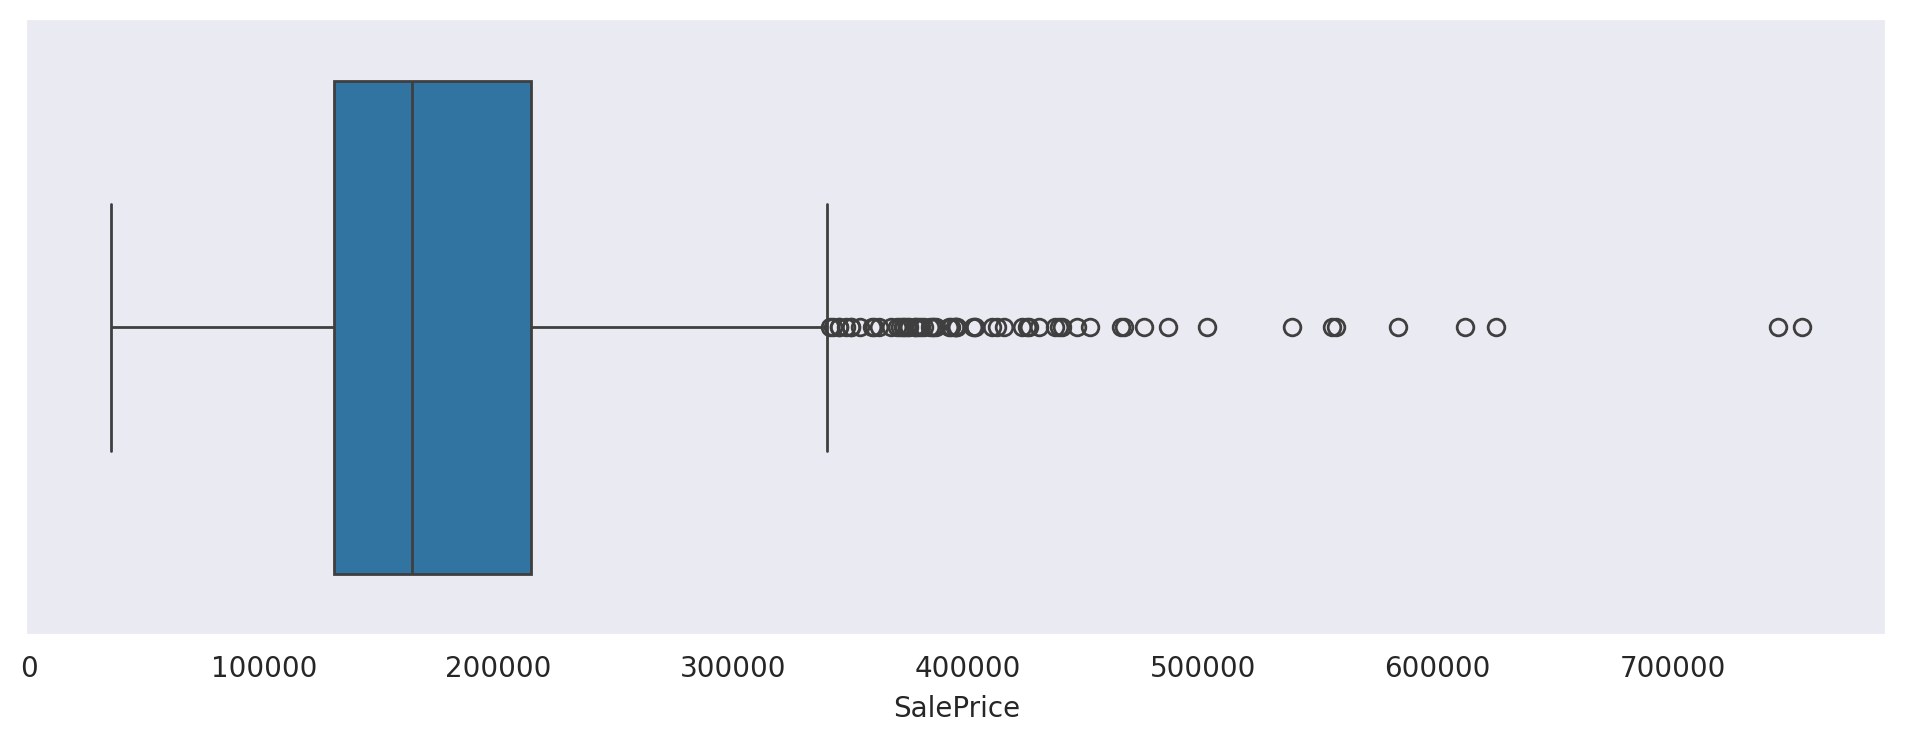

In [164]:
plt.figure(figsize=(12, 4))
sns.boxplot(x=df_house_pricing.SalePrice)
plt.show()

In [165]:
df_house_pricing["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

A partir dos dados de tendência central e do gráfico boxplot podemos comprovar que existe outliers que influenciam na distribuição dos dados, como a média é sencível a outliers seu valor ficou distante da mediana. O boxplot permitiu observar os outliers de forma visual dando mais robustes a análise.

---

### **Análise dos preços das casas**

***Por que será que essas casas do percentil 75 até o valor máximo são tão mais caras do que o restante?***

Para responder isso, vamos voltar nas colunas que selecionamos

In [166]:
df_house_pricing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    1460 non-null   int64 
 1   SalePrice     1460 non-null   int64 
 2   OverallQual   1460 non-null   int64 
 3   OverallCond   1460 non-null   int64 
 4   BedroomAbvGr  1460 non-null   int64 
 5   TotRmsAbvGrd  1460 non-null   int64 
 6   GrLivArea     1460 non-null   int64 
 7   TotalBsmtSF   1460 non-null   int64 
 8   YearBuilt     1460 non-null   int64 
 9   MSZoning      1460 non-null   object
 10  Utilities     1460 non-null   object
 11  BldgType      1460 non-null   object
dtypes: int64(9), object(3)
memory usage: 137.0+ KB


## **Hipóteses**

Das variáveis **numéricas**, podemos pensar em algumas hipóteses:

1.   A média/mediana da qualidade do imóvel é superior para os apartamentos mais caros
2.   A média/mediana da quantidade de cômodos/quartos/área/banheiros é maior em apartamentos mais caros
3.   Os apartamentos mais caros são mais antigos

Das variáveis **categóricas**, podemos pensar em algumas hipóteses:

4.   Existe diferença de preço de acordo com sua localização (zona) 
5.   As utilidades (gás, água, etc) existentes na casa tem influência no preço
6.   O tipo de habitação influencia o preço (duplex, condomínio, etc)


***Agora, precisamos validar se essas hipóteses são verdadeiras ou não com dados***


### **Dados Numéricas** 

Resumo de medidas de tendências centrais

In [167]:
df_house_pricing.describe()

,Unnamed: 0,SalePrice,OverallQual,OverallCond,BedroomAbvGr,TotRmsAbvGrd,GrLivArea,TotalBsmtSF,YearBuilt
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,729.500000,180921.195890,6.099315,5.575342,2.866438,6.517808,1515.463699,1057.429452,1971.267808
std,421.610009,79442.502883,1.382997,1.112799,0.815778,1.625393,525.480383,438.705324,30.202904
min,0.000000,34900.000000,1.000000,1.000000,0.000000,2.000000,334.000000,0.000000,1872.000000
25%,364.750000,129975.000000,5.000000,5.000000,2.000000,5.000000,1129.500000,795.750000,1954.000000
50%,729.500000,163000.000000,6.000000,5.000000,3.000000,6.000000,1464.000000,991.500000,1973.000000
75%,1094.250000,214000.000000,7.000000,6.000000,3.000000,7.000000,1776.750000,1298.250000,2000.000000
max,1459.000000,755000.000000,10.000000,9.000000,8.000000,14.000000,5642.000000,6110.000000,2010.000000


#### Criando uma nova coluna categórica contendo a informação de casas ***Caras*** e ***Baratas***

Para validarmos nossas hipóteses, vamos criar uma coluna que nos diga se a casa era "cara" ou se a casa era "barata" - sendo que o que definimos como "cara" são as casas acima do percentil 75 (214k) e como "baratas" as casas abaixo desse percentil 75.

In [168]:
df_house_pricing['categoria_preco'] = (
    np.where(df_house_pricing
             ['SalePrice']>214000, "cara", "barata"))
df_house_pricing


,Unnamed: 0,SalePrice,OverallQual,OverallCond,BedroomAbvGr,TotRmsAbvGrd,GrLivArea,TotalBsmtSF,YearBuilt,MSZoning,Utilities,BldgType,categoria_preco
0,0,208500,7,5,3,8,1710,856,2003,RL,AllPub,1Fam,barata
1,1,181500,6,8,3,6,1262,1262,1976,RL,AllPub,1Fam,barata
2,2,223500,7,5,3,6,1786,920,2001,RL,AllPub,1Fam,cara
3,3,140000,7,5,3,7,1717,756,1915,RL,AllPub,1Fam,barata
4,4,250000,8,5,4,9,2198,1145,2000,RL,AllPub,1Fam,cara
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1455,175000,6,5,3,7,1647,953,1999,RL,AllPub,1Fam,barata
1456,1456,210000,6,6,3,7,2073,1542,1978,RL,AllPub,1Fam,barata
1457,1457,266500,7,9,4,9,2340,1152,1941,RL,AllPub,1Fam,cara
1458,1458,142125,5,6,2,5,1078,1078,1950,RL,AllPub,1Fam,barata


Vamos agora começar a calcular as estatísticas de cada uma das categorias criadas

In [169]:
(df_house_pricing
 .groupby("categoria_preco")
 ["OverallQual"].mean().to_frame().reset_index())

,categoria_preco,OverallQual
0,barata,5.588342
1,cara,7.649171


In [170]:

def boxplot_preco(coluna):
    dados = (df_house_pricing
            .groupby(["categoria_preco"])
            .agg({
                coluna: "mean",
                coluna: "median"
            }))

    print(f"\nMédia: {dados[coluna][0]}")
    print(f"Mediana: {dados[coluna][1]}")

    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df_house_pricing,
                x="categoria_preco",
                y=coluna,
                hue="categoria_preco",
                palette=sns.color_palette("hls", 2))
    plt.xticks(rotation=90);
    plt.xlabel("Categoria Preço")
    plt.ylabel(coluna)
    sns.despine(offset=10, trim=True);
    plt.show()

**Boxplot da categoria de preço por OverallQual (Qualificação geral)**


Média: 6.0
Mediana: 8.0


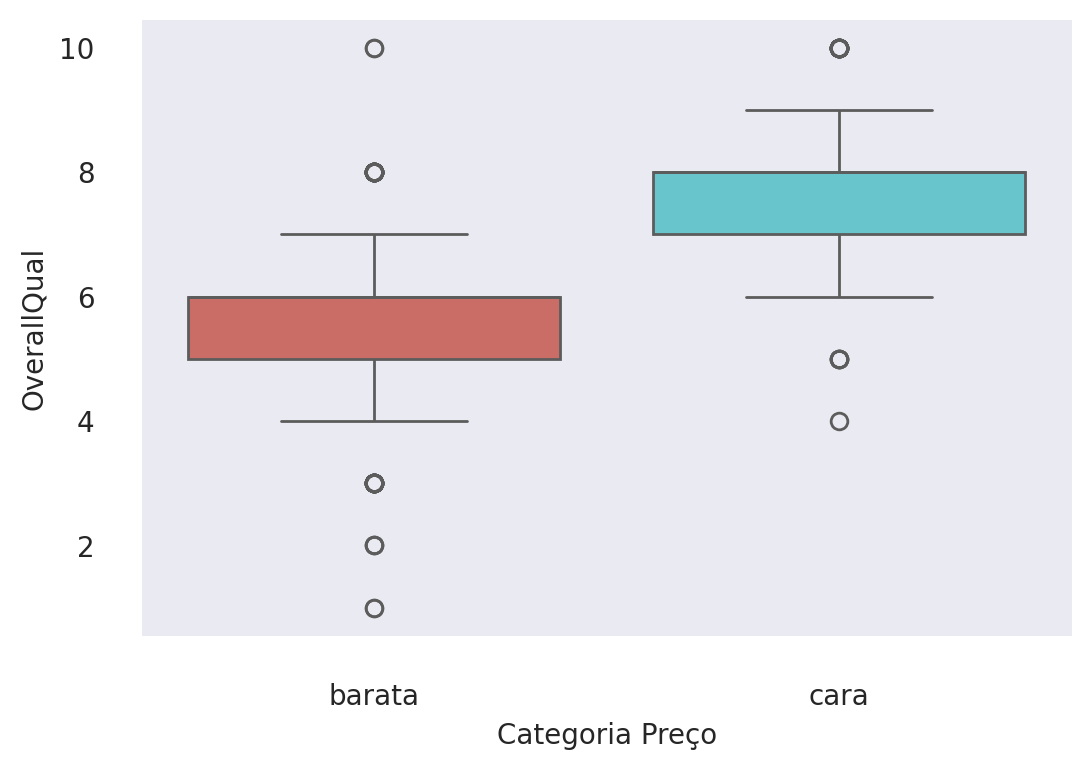

In [171]:
boxplot_preco("OverallQual")

**Boxplot da categoria de preço por OverallCond (Condição Geral)**


Média: 5.0
Mediana: 5.0


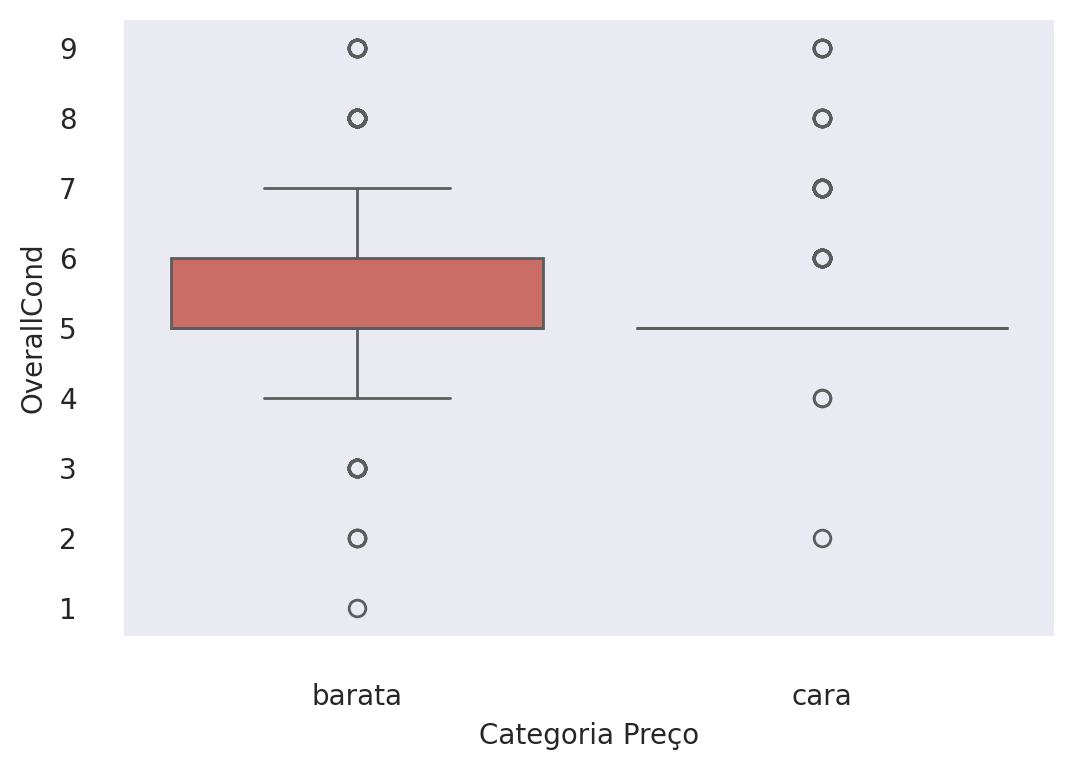

In [172]:
boxplot_preco("OverallCond")

**Boxplot da categoria de preço por BedroomAbvGr (Quartos acima do subsolo)**


Média: 3.0
Mediana: 3.0


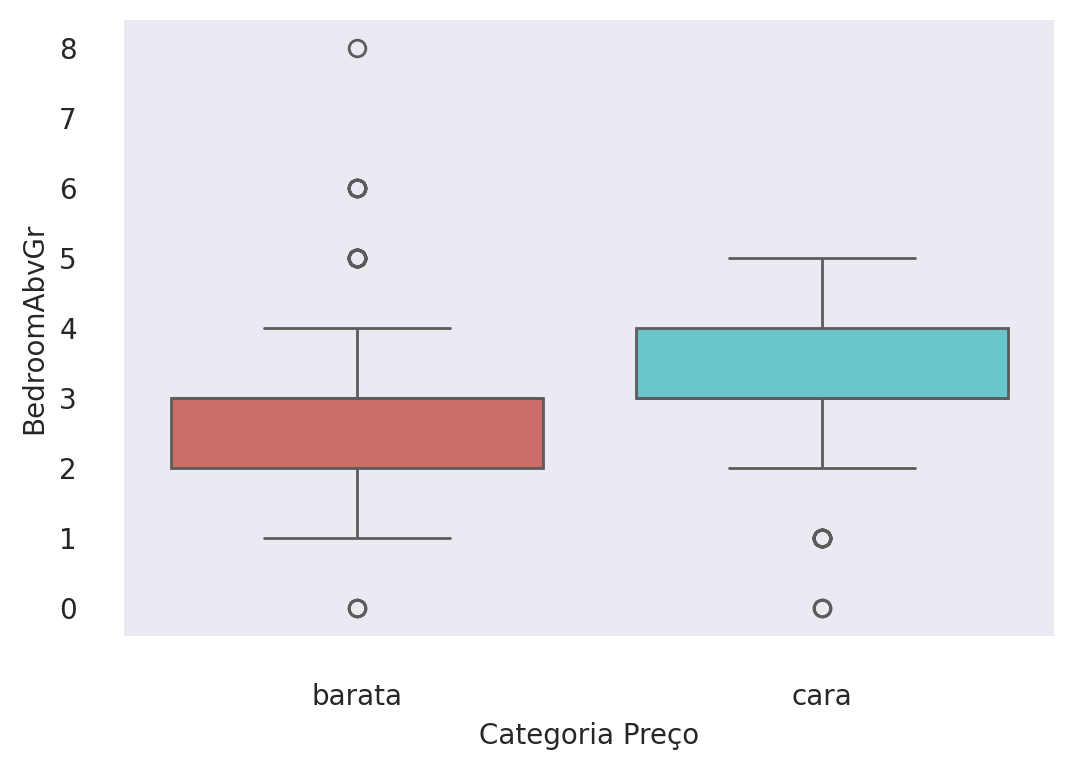

In [173]:
boxplot_preco("BedroomAbvGr")

**Boxplot da categoria de preço por TotRmsAbvGrd ()**


Média: 6.0
Mediana: 8.0


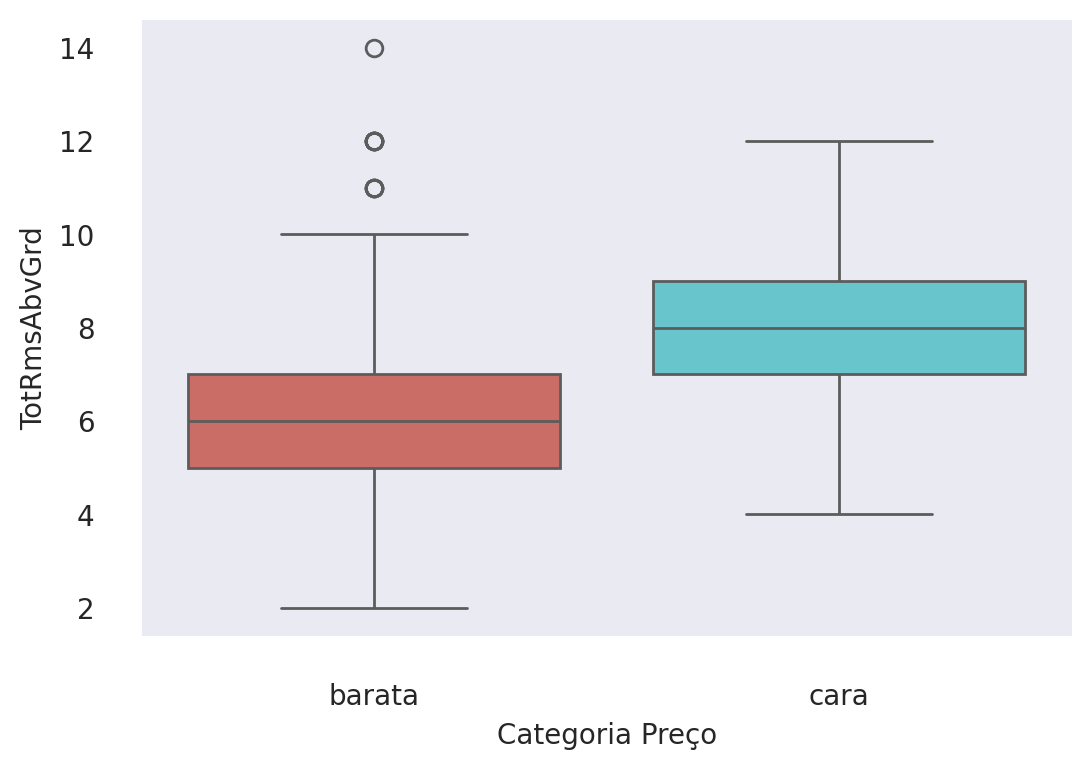

In [174]:
boxplot_preco("TotRmsAbvGrd")

**Boxplot da categoria de preço por GrLivArea ()**


Média: 1308.5
Mediana: 1956.0


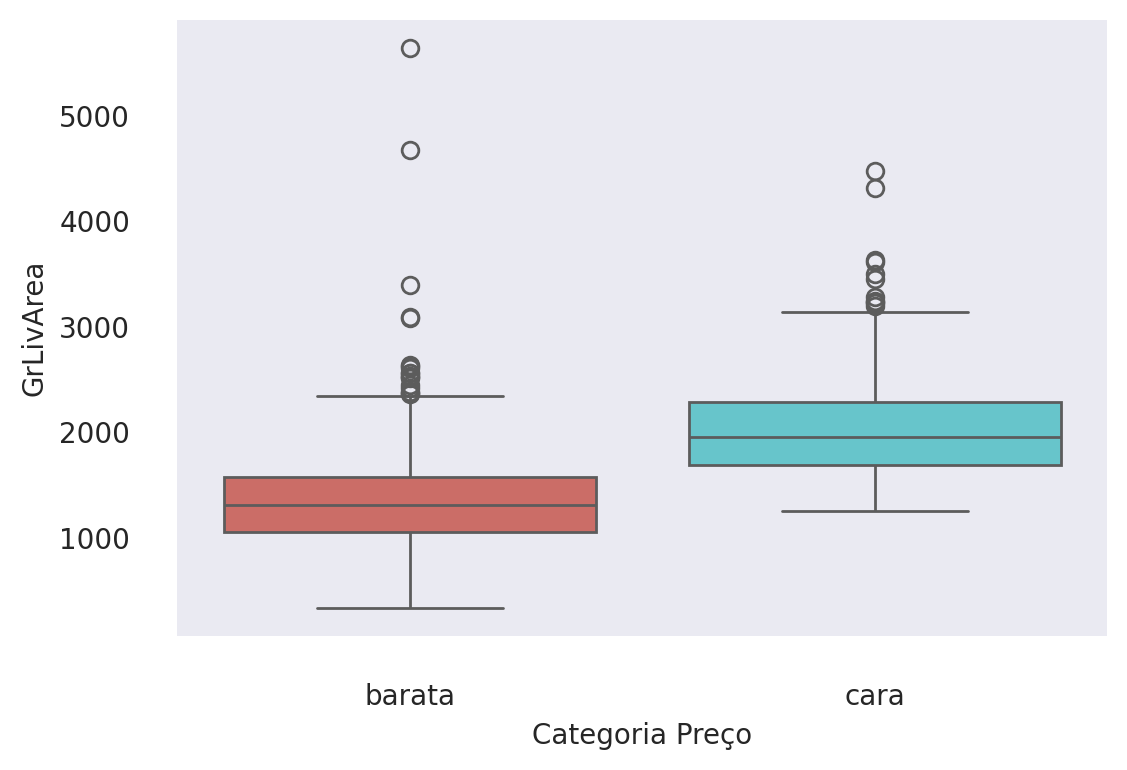

In [175]:
boxplot_preco("GrLivArea")

**Boxplot da categoria de preço por TotalBsmtSF ()**


Média: 912.0
Mediana: 1452.5


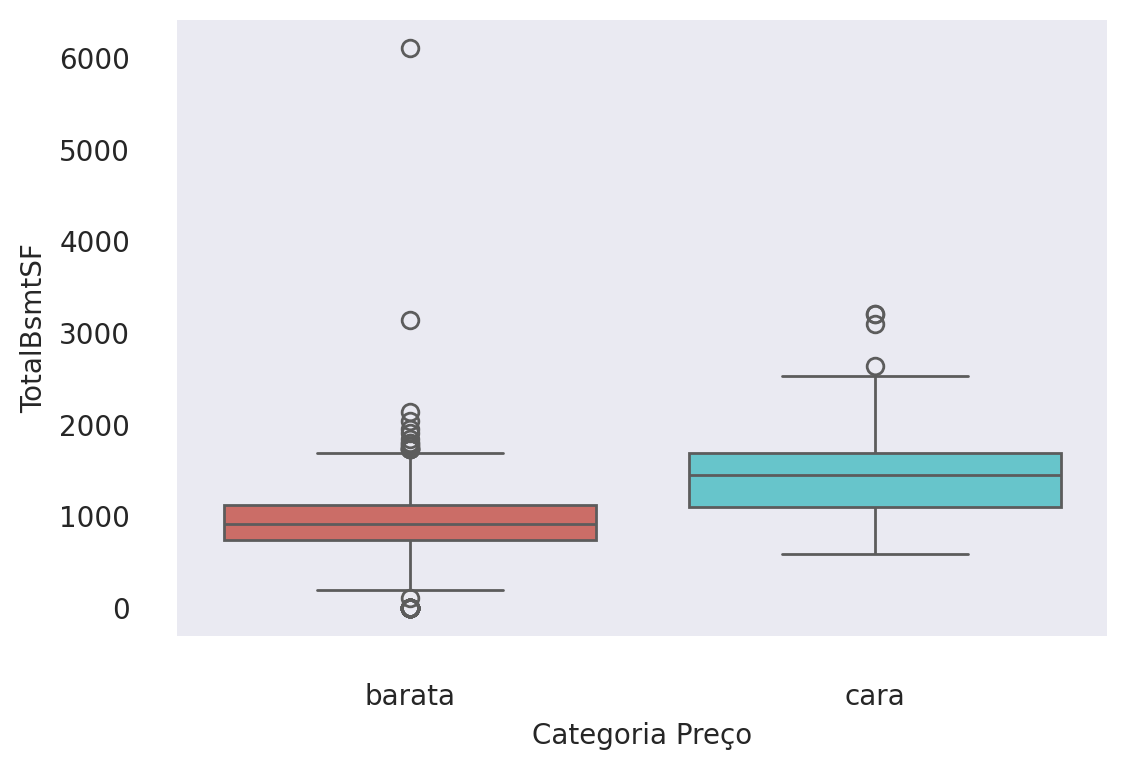

In [176]:
boxplot_preco("TotalBsmtSF")

**Boxplot da categoria de preço por TotalBsmtSF ()**


Média: 1965.5
Mediana: 2002.0


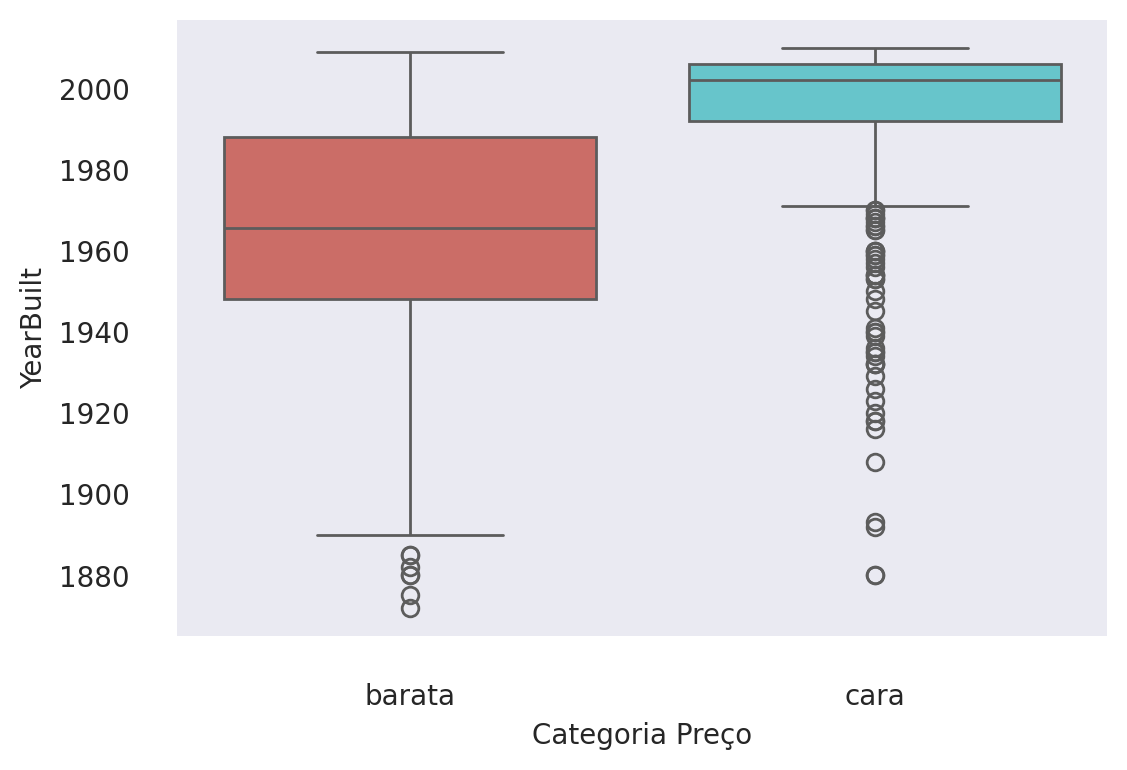

In [177]:
boxplot_preco("YearBuilt")